In [13]:
import numpy as np
import matplotlib.pyplot as plt
import PIL

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator
from qiskit.providers.ibmq import least_busy

from PIL import Image

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2022-09-29 09:04:48,247: Credentials are already in use. The existing account in the session will be replaced.


In [14]:
# Loading our image in the Quantum State
test_image = Image.open('clock_test_image_8x8.tif')
np_test_image = np.array(test_image)

# We need to do this so that we take only a single channel of the color data in the .tif image
test_image_final = []
for row in np_test_image:
    for pixel in row:
        test_image_final.append( pixel[0] / 256)

np_test_image = np.array(test_image_final)

np_test_image = np_test_image.reshape((8,8))
print(np_test_image)


[[0.734375   0.7890625  0.80859375 0.8203125  0.828125   0.81640625
  0.80859375 0.77734375]
 [0.79296875 0.859375   0.87109375 0.87890625 0.890625   0.90234375
  0.890625   0.859375  ]
 [0.84375    0.890625   0.89453125 0.90625    0.859375   0.6328125
  0.77734375 0.90234375]
 [0.86328125 0.8984375  0.8984375  0.91796875 0.7734375  0.31640625
  0.453125   0.94140625]
 [0.89453125 0.9375     0.91796875 0.91796875 0.8203125  0.26171875
  0.4375     0.96875   ]
 [0.68359375 0.51953125 0.6953125  0.953125   0.734375   0.3359375
  0.49609375 0.65625   ]
 [0.5625     0.5390625  0.52734375 0.99609375 0.4140625  0.16796875
  0.22265625 0.33203125]
 [0.61328125 0.6171875  0.71484375 0.90625    0.73046875 0.55859375
  0.5625     0.578125  ]]


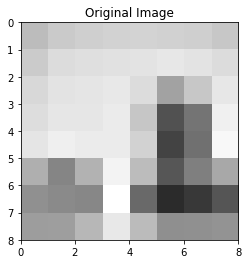

In [15]:
# Function to plot our image
def plot_image8x8(img, title: str):
    plt.title(title)
    plt.imshow(img, extent=[0, 8, 8, 0], vmin=0, vmax=1, cmap='gray')
    plt.show()
    
plot_image8x8(np_test_image, "Original Image")   

[[0.12184001 0.1309132  0.13415363 0.13609788 0.13739405 0.1354498
  0.13415363 0.12896894]
 [0.13156128 0.14257873 0.14452299 0.14581916 0.14776341 0.14970767
  0.14776341 0.14257873]
 [0.13998639 0.14776341 0.1484115  0.15035575 0.14257873 0.10498979
  0.12896894 0.14970767]
 [0.14322682 0.14905958 0.14905958 0.15230001 0.12832086 0.0524949
  0.07517788 0.15618852]
 [0.1484115  0.15554043 0.15230001 0.15230001 0.13609788 0.0434217
  0.07258554 0.16072512]
 [0.1134149  0.08619532 0.11535916 0.15813278 0.12184001 0.05573532
  0.08230681 0.1088783 ]
 [0.09332426 0.08943575 0.08749149 0.16526171 0.06869703 0.02786766
  0.03694085 0.05508724]
 [0.10174937 0.10239745 0.11859958 0.15035575 0.12119192 0.09267618
  0.09332426 0.0959166 ]]


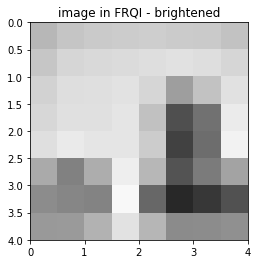

In [16]:
def normalize(array):
    rms = np.sqrt(np.sum(np.sum(array**2)))
    ret_array = []
    for i in array:
        ret_array.append( (i * (1/rms)) )
    
    npret_array = np.array(ret_array)
    return npret_array

def plot_image8x8_brightened(img, title: str):
    plt.title(title)
    plt.imshow(img, extent=[0, 4, 4, 0], vmin=0, vmax=0.17, cmap='gray')
    plt.show()
    

np_test_image_normalized = normalize(np_test_image)
print(np_test_image_normalized)

plot_image8x8_brightened(np_test_image_normalized, 'image in FRQI - brightened')

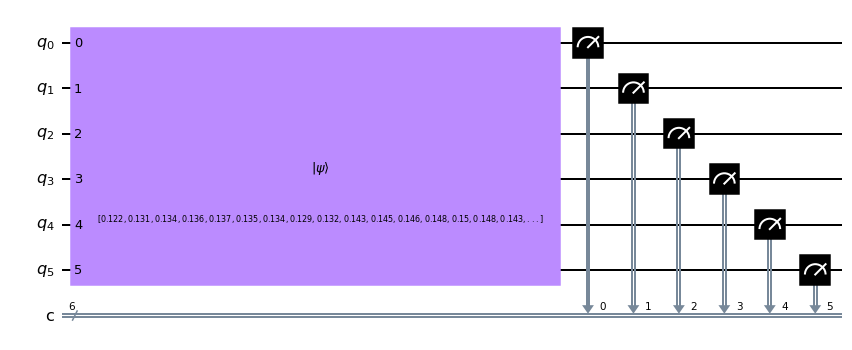

In [17]:
initial_state = []

for row in np_test_image_normalized:
    for pixel in row:
        initial_state.append(pixel)
        
qc_image = QuantumCircuit(6,6)

qc_image.initialize(initial_state, [0,1,2,3,4,5])

qc_image.measure([0,1,2,3,4,5], [0,1,2,3,4,5])

qc_image.draw()

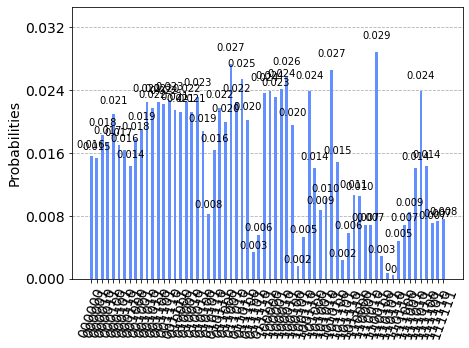

In [18]:
#Running on a simulator:
simulator = Aer.get_backend('aer_simulator')
qc_image_transpiled = transpile(qc_image, simulator)

# Run and get statevector
result_simulator = simulator.run(qc_image_transpiled, shots=4096).result()
counts_simulator = result_simulator.get_counts()

plot_histogram(counts_simulator)

[[0.125      0.12401959 0.13531647 0.13165859 0.14490029 0.13072813
  0.12789614 0.1200179 ]
 [0.13350006 0.13799626 0.14986974 0.14740596 0.14986974 0.149053
  0.15068204 0.14657549]
 [0.1457403  0.14986974 0.1457403  0.15229366 0.13710882 0.09110862
  0.12789614 0.14740596]
 [0.14149039 0.16535946 0.14986974 0.15934436 0.14235052 0.0584634
  0.07493487 0.1538884 ]
 [0.15467961 0.15229366 0.15546679 0.16010861 0.13975425 0.04133986
  0.07328775 0.15467961]
 [0.11899645 0.09375    0.10126157 0.16312979 0.12203515 0.04941059
  0.07654655 0.10364452]
 [0.10245998 0.08267973 0.08267973 0.16973095 0.05412659 0.02706329
  0.02209709 0.06987712]
 [0.08267973 0.09243875 0.11899645 0.15467961 0.1200179  0.0841432
  0.08558165 0.08699632]]


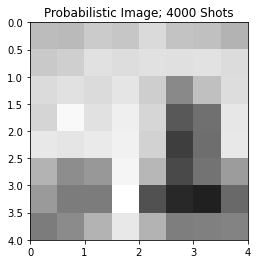

In [19]:
get_bin = lambda x, n: format(x, 'b').zfill(n)

image_counts_simulator = [counts_simulator[get_bin(i,6)] for i in range(2**6)] 

np_image_counts_simulator = np.array(image_counts_simulator)
np_image_counts_simulator = np_image_counts_simulator / 4000
np_image_counts_simulator = np.sqrt(np_image_counts_simulator)
np_image_counts_simulator = normalize(np_image_counts_simulator)

np_image_counts_simulator = np_image_counts_simulator.reshape((8,8))

print(np_image_counts_simulator)

plot_image8x8_brightened(np_image_counts_simulator, "Probabilistic Image; 4000 Shots")

In [23]:
# Running on actual Quantum Hardware:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= (6) and
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

# Run our circuit on the least busy backend. Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor

qc_image_transpiled = transpile(qc_image, backend, optimization_level=3)
job_qc_image = backend.run(qc_image_transpiled)
job_monitor(job_qc_image, interval=2)

ibmqfactory.load_account:WARNING:2022-09-29 07:57:55,095: Credentials are already in use. The existing account in the session will be replaced.


least busy backend:  ibm_nairobi
Job Status: job is queued (524)   

KeyboardInterrupt: 

ibmqfactory.load_account:WARNING:2022-09-29 09:06:53,817: Credentials are already in use. The existing account in the session will be replaced.


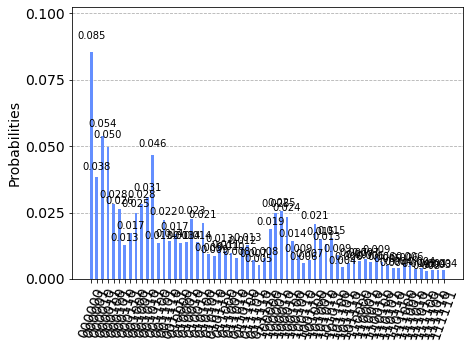

In [22]:
# The job we're looking at is Job_ID = 6335500bd57c83c02f1c94b8 on ibm_nairobi
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
nairobi = provider.get_backend('ibm_nairobi')
nairobi_image_counts = nairobi.retrieve_job('6335500bd57c83c02f1c94b8').result().get_counts()

plot_histogram(nairobi_image_counts)

In [11]:
# Let's calculate the RMSE for our simulator output:
def un_normalize(true_image, true_image_normalized, image, n):
    normalization_factor = 0.0
    for x in range(n):
        for y in range(n):
            normalization_factor += (true_image_normalized[y][x] / true_image[y][x])
    
    #The average normalization factor, to account for floating point errors.
    normalization_factor /= (n**2)
    
    image = image / normalization_factor
    return image

def rmse_image_error(true_image, error_image, n):
    rms_error = 0.0
    for y in range(n):
        for x in range(n):
            rms_error += ((true_image[y][x] - error_image[y][x]) ** 2)
            
    rms_error = np.sqrt(rms_error)
    return (rms_error / (n**2))

In [12]:
rmse_simulator = rmse_image_error(np_test_image, un_normalize(np_test_image, np_test_image_normalized, np_image_counts_simulator, 8), 8)
print("Simulator error: ", (rmse_simulator * 100), "% per pixel")

Simulator error:  0.5225315692824859 % per pixel


[[0.29197603 0.19621417 0.23184046 0.22304708 0.16807736 0.16201852
  0.1129159  0.13133926]
 [0.15811388 0.16807736 0.17535678 0.21563859 0.1161895  0.14916434
  0.11937336 0.12942179]
 [0.1161895  0.11726039 0.15083103 0.11726039 0.1457738  0.09617692
  0.09219544 0.1118034 ]
 [0.10246951 0.09874209 0.08803408 0.10954451 0.1129159  0.08514693
  0.07245688 0.08944272]
 [0.13693064 0.15811388 0.15968719 0.1532971  0.11937336 0.09486833
  0.07745967 0.083666  ]
 [0.1440486  0.12247449 0.11510864 0.124499   0.09486833 0.06708204
  0.07745967 0.08660254]
 [0.08215838 0.08660254 0.08062258 0.09219544 0.07905694 0.07245688
  0.06324555 0.06519202]
 [0.07582875 0.07745967 0.06123724 0.06519202 0.05477226 0.0591608
  0.05700877 0.0591608 ]]


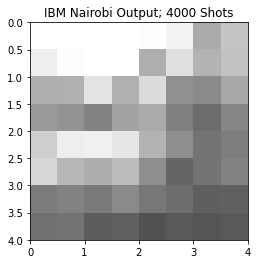

In [23]:
# We finally got the results for the 8x8 image on ibm_nairobi
get_bin = lambda x, n: format(x, 'b').zfill(n)

image_counts_nairobi = [nairobi_image_counts[get_bin(i,6)] for i in range(2**6)] 

np_image_counts_nairobi = np.array(image_counts_nairobi)
np_image_counts_nairobi = np_image_counts_nairobi / 4000
np_image_counts_nairobi = np.sqrt(np_image_counts_nairobi)
np_image_counts_nairobi = normalize(np_image_counts_nairobi)

np_image_counts_nairobi = np_image_counts_nairobi.reshape((8,8))

print(np_image_counts_nairobi)

plot_image8x8_brightened(np_image_counts_nairobi, "IBM Nairobi Output; 4000 Shots")

In [24]:
rmse_simulator = rmse_image_error(np_test_image, un_normalize(np_test_image, np_test_image_normalized, np_image_counts_simulator, 8), 8)
rmse_nairobi = rmse_image_error(np_test_image, un_normalize(np_test_image, np_test_image_normalized, np_image_counts_nairobi, 8), 8)
print("Simulator error: ", (rmse_simulator * 100), "% per pixel")
print("IBM Nairobi error: ", (rmse_nairobi * 100), "% per pixel")

Simulator error:  0.5413171148558765 % per pixel
IBM Nairobi error:  3.327741483144131 % per pixel


In [27]:
from skimage.metrics import structural_similarity as ssim
np_image_counts_simulator_unnormalized = un_normalize(np_test_image, np_test_image_normalized, np_image_counts_simulator, 8)
np_image_counts_nairobi_unnormalized = un_normalize(np_test_image, np_test_image_normalized, np_image_counts_nairobi, 8)

ssim_simulator = ssim(np_test_image, np_image_counts_simulator_unnormalized, data_range=np_image_counts_simulator_unnormalized.max() - np_image_counts_simulator_unnormalized.min())
ssim_nairobi = ssim(np_test_image, np_image_counts_nairobi_unnormalized, data_range=np_image_counts_nairobi_unnormalized.max() - np_image_counts_nairobi_unnormalized.min())
print("Simulator SSIM: ", (ssim_simulator * 100), "% Similar")
print("IBM Nairobi SSIM: ", (ssim_nairobi * 100), "% Similar")

Simulator SSIM:  98.32985193061381 % Similar
IBM Nairobi SSIM:  54.70756122758695 % Similar
